In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
housing_data_to_load = "data/Zip_Zill_AllHomes.csv"

house_value_data = pd.read_csv(housing_data_to_load)
house_value_data.set_index("SizeRank")
house_value_data.head(8709)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,168300.0,168400.0,168400.0,...,1096600,1084600,1079300,1072000,1064600,1049300,1024800,1008400,999100,985100
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,160000.0,161000.0,161700.0,...,346900,347200,348500,350500,352500,352800,352600,352800,352100,350200
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,353100.0,353700.0,354200.0,...,1460200,1436000,1411000,1390900,1379600,1370600,1361700,1358400,1350000,1334100
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,210400.0,212200.0,212200.0,...,336800,338100,338500,337200,336200,336100,335300,334000,333400,333200
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,194400.0,196100.0,197300.0,...,429600,430700,429800,429900,431300,431900,432000,431700,430100,428200
5,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,6,95400.0,95600.0,95800.0,...,177400,178100,178700,179600,180300,180900,181900,183200,182900,181500
6,93144,79936,El Paso,TX,El Paso,El Paso County,7,77200.0,77200.0,77300.0,...,123700,124700,125800,126400,126800,127500,128200,128600,128800,128800
7,91733,77084,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,8,94700.0,95000.0,95200.0,...,167100,168300,169200,170400,171900,173400,175200,177300,177200,175500
8,61616,10002,New York,NY,New York-Newark-Jersey City,New York County,9,NaN,NaN,NaN,...,1001300,999800,992600,979300,970400,961800,948400,941600,933200,918400
9,61807,10467,New York,NY,New York-Newark-Jersey City,Bronx County,10,140900.0,140900.0,140900.0,...,411800,415800,419500,421900,422300,422700,424200,427700,431200,432900


In [4]:
house_value_melt = pd.melt(house_value_data, id_vars=["RegionID","RegionName", "City", "State", "Metro", "CountyName", "SizeRank"],
                           var_name="Date", value_name="Value")
house_value_melt.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Date,Value
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,1996-04,168300.0
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,1996-04,160000.0
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,1996-04,353100.0
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,1996-04,210400.0
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,1996-04,194400.0


In [12]:
scotts_df = house_value_melt.loc[house_value_melt["RegionName"] == 23230, :]
scotts_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Date,Value
8707,67605,23230,Henrico,VA,Richmond,Henrico County,8708,1996-04,80200.0
24237,67605,23230,Henrico,VA,Richmond,Henrico County,8708,1996-05,80400.0
39767,67605,23230,Henrico,VA,Richmond,Henrico County,8708,1996-06,80600.0
55297,67605,23230,Henrico,VA,Richmond,Henrico County,8708,1996-07,80800.0
70827,67605,23230,Henrico,VA,Richmond,Henrico County,8708,1996-08,80900.0


In [21]:
scotts_df["Date"] = scotts_df["Date"].str[:4]


In [24]:
#Adding Tableau 20 color scheme

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

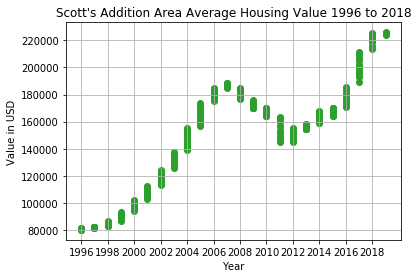

In [32]:
plt.scatter(scotts_df["Date"], scotts_df["Value"], color=tableau20[4], label="Scott's Addition")

plt.xticks(["1996", "1998", "2000","2002", "2004", "2006", "2008", "2010",
            "2012", "2014", "2016", "2018"])

plt.title("Scott's Addition Housing Values 1996 to 2018")
plt.ylabel("Value in USD")
plt.xlabel("Year")
plt.grid(True)



plt.show()

In [45]:
scotts_avg = scotts_df.groupby(["Date"]).mean()
scotts_avg.head()

,RegionID,RegionName,SizeRank,Value
Date,,,,
1996,67605,23230,8708,80866.666667
1997,67605,23230,8708,82058.333333
1998,67605,23230,8708,84400.000000
1999,67605,23230,8708,90108.333333
2000,67605,23230,8708,98291.666667


In [29]:
richmond_df = house_value_melt.loc[house_value_melt["Metro"] == "Richmond", :]
richmond_df = richmond_df.loc[richmond_df["State"] == "VA", :]
richmond_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Date,Value
305,67598,23223,Richmond,VA,Richmond,Richmond City,306,1996-04,58700.0
621,67541,23112,Midlothian,VA,Richmond,Chesterfield County,622,1996-04,122900.0
649,67600,23225,Richmond,VA,Richmond,Richmond City,650,1996-04,74200.0
1184,67595,23220,Richmond,VA,Richmond,Richmond City,1185,1996-04,78400.0
1212,67609,23234,Richmond,VA,Richmond,Richmond City,1213,1996-04,72000.0


In [33]:
richmond_df["Date"] = richmond_df["Date"].str[:4]

In [42]:
richmond_df = richmond_df.groupby(["Date"]).mean()
richmond_df.head()

,RegionID,RegionName,SizeRank,Value
Date,,,,
1996,67577.918033,23199.360656,7087.0,110338.477366
1997,67577.918033,23199.360656,7087.0,113481.651376
1998,67577.918033,23199.360656,7087.0,120814.035088
1999,67577.918033,23199.360656,7087.0,127739.766082
2000,67577.918033,23199.360656,7087.0,135223.538012


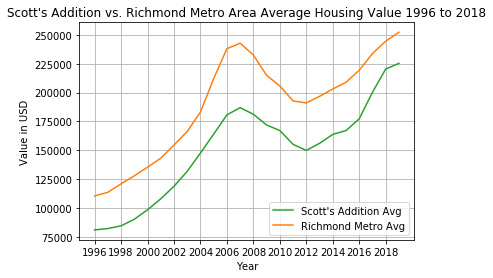

In [47]:
scotts_line, = plt.plot(scotts_avg.index, scotts_avg["Value"], color=tableau20[4], label="Scott's Addition Avg")
richmond_line, = plt.plot(richmond_df.index, richmond_df["Value"], color=tableau20[2], label="Richmond Metro Avg")

plt.xticks(["1996", "1998", "2000","2002", "2004", "2006", "2008", "2010",
            "2012", "2014", "2016", "2018"])

plt.legend(handles=[scotts_line, richmond_line],loc="best")

plt.title("Scott's Addition vs. Richmond Metro Area Average Housing Value 1996 to 2018")
plt.ylabel("Value in USD")
plt.xlabel("Year")
plt.grid(True)

plt.show()